In [1]:
pip install Faker


Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import random
from faker import Faker

# Initialize Faker to generate fake data
fake = Faker()

# Define a list of Indian cities
indian_cities = ['Mumbai', 'Delhi', 'Bangalore', 'Kolkata', 'Chennai', 'Hyderabad', 'Pune', 'Ahmedabad', 'Surat', 'Jaipur', 'Lucknow', 'Kanpur', 'Nagpur', 'Visakhapatnam', 'Indore', 'Thane', 'Bhopal', 'Patna', 'Vadodara', 'Ghaziabad']

# Define the number of users
num_users = 1000

# Generate synthetic data for each user
data = []
for _ in range(num_users):
    user_id = fake.random_number(digits=6)
    age = random.randint(20, 60)
    gender = random.choice(['Male', 'Female'])
    location = random.choice(indian_cities) + ", India"  # Select a random Indian city
    income_level = random.choice(['Low', 'Medium', 'High'])
    education_level = random.choice(['High School', 'Undergraduate', 'Graduate'])
    number_of_children = random.randint(0, 5)  # Adjusted to allow for no children
    child_age = random.randint(0, 18) if number_of_children > 0 else None  # Child age only if there are children
    investment_amount = random.randint(1000, 50000)
    investment_frequency = random.randint(1, 10)
    investment_options = random.choices(['Mutual Funds', 'Digital Gold', 'US ETFs'], k=3)
    app_sessions = random.randint(1, 30)
    app_usage_duration = random.randint(1, 60)
    features_used = random.choices(['Goal Setting', 'Investment Tracking', 'Expert Advice'], k=2)
    
    # Formula for Goal Creation
    if (age < 40) and (income_level == 'High') and (education_level != 'High School'):
        goals_created = 1
    else:
        goals_created = 0
    
    # Formula for Investment Decision
    if (income_level == 'High') and (education_level != 'High School'):
        investment_decision = 1 if random.random() < 0.7 else 0  # Higher likelihood for high income users with higher education
    else:
        investment_decision = 1 if random.random() < 0.2 else 0  # Lower likelihood for other users
    
    interactions_with_experts = random.randint(0, 10)
    topics_discussed = random.choices(['Investment Options', 'Risk Tolerance', 'Financial Planning'], k=2)
    feedback_rating = random.randint(3, 5)  # Adjusted for a positive rating bias

    # Append user data to the list
    data.append([user_id, age, gender, location, income_level, education_level, number_of_children, 
                 child_age, investment_amount, investment_frequency, investment_options, app_sessions, 
                 app_usage_duration, features_used, goals_created, investment_decision,
                 interactions_with_experts, topics_discussed, feedback_rating])

# Replace None values with appropriate defaults
def replace_none(value, default):
    return value if value is not None else default

for row in data:
    row[7] = replace_none(row[7], 0)  # Default child_age to 0 if None
    row[15] = replace_none(row[15], 0)  # Default goals_created to 0 if None
    row[16] = replace_none(row[16], 0)  # Default investment_decision to 0 if None

# Create a DataFrame from the synthetic data
columns = ['user_id', 'age', 'gender', 'location', 'income_level', 'education_level', 'number_of_children', 
           'child_age', 'investment_amount', 'investment_frequency', 'investment_options', 'app_sessions', 
           'app_usage_duration', 'features_used', 'goals_created', 'investment_decision',
           'interactions_with_experts', 'topics_discussed', 'feedback_rating']

df = pd.DataFrame(data, columns=columns)

# Save the synthetic dataset to a CSV file
df.to_csv('edufund_data.csv', index=False)


   user_id  age  gender              location income_level education_level  \
0    20542   27  Female  Visakhapatnam, India          Low     High School   
1   611364   36    Male         Mumbai, India         High     High School   
2   506473   38  Female  Visakhapatnam, India          Low     High School   
3    38296   27  Female           Pune, India         High   Undergraduate   
4   831794   28    Male         Kanpur, India       Medium        Graduate   

   number_of_children  child_age  investment_amount  investment_frequency  \
0                   5         14              19801                     7   
1                   4         10              44250                     7   
2                   4         10              12235                     1   
3                   1         15               1943                     8   
4                   0          0              42792                     3   

                                 investment_options  app_sessions  \

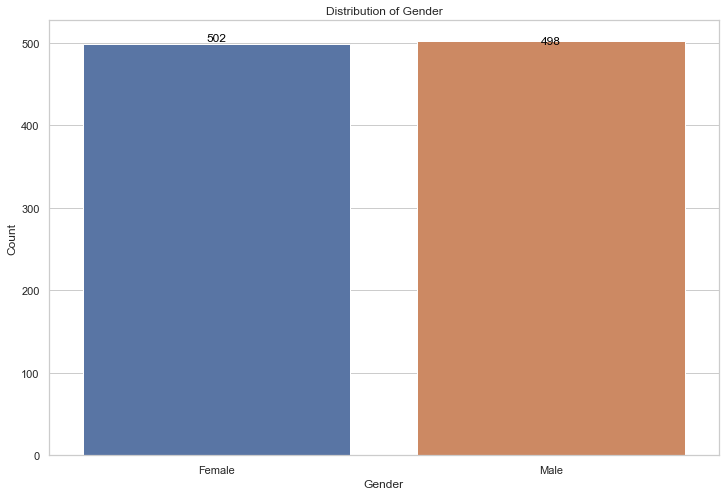

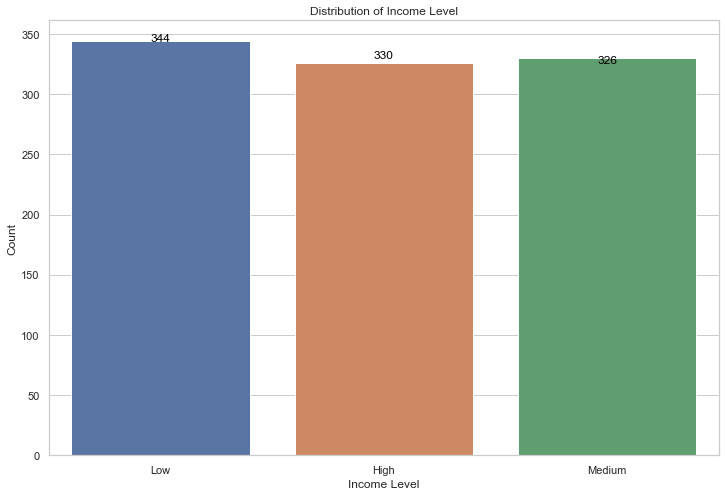

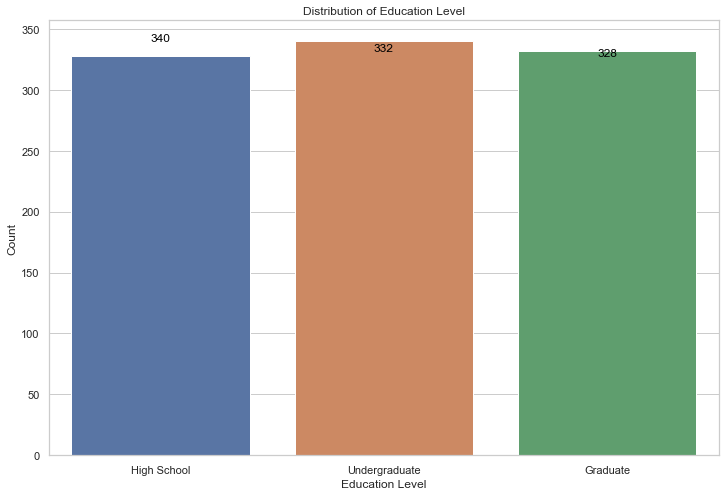

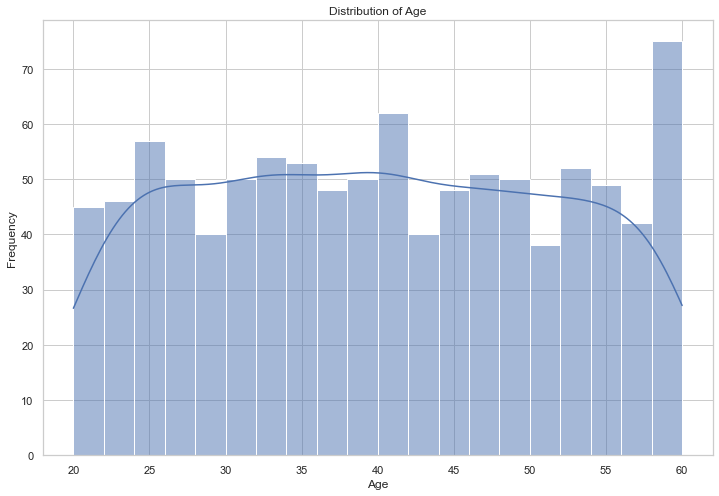

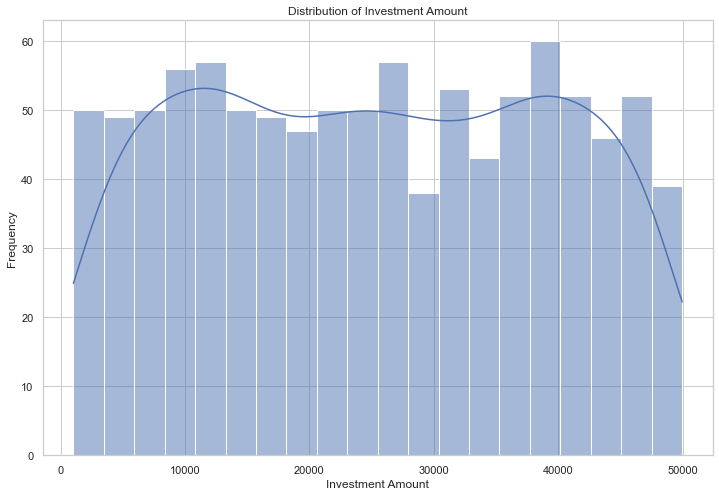

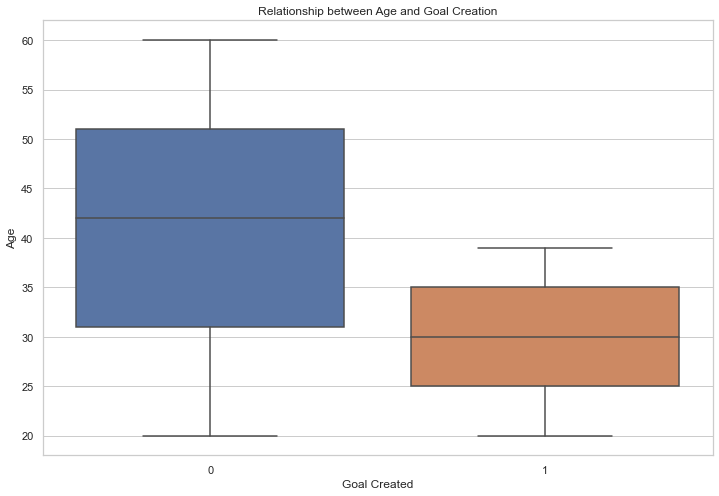

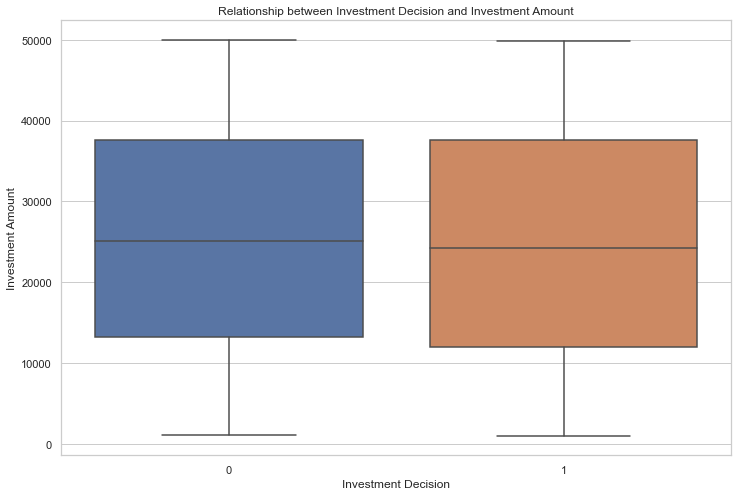

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('edufund_data.csv')

# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Distribution of categorical variables
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
# Add numeric values below the bars
for i in range(len(df['gender'].value_counts())):
    plt.text(x=i, y=df['gender'].value_counts()[i], s=df['gender'].value_counts()[i], ha='center', color='black')
# Save the plot as an image
plt.savefig('gender_distribution.png')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='income_level')
plt.title('Distribution of Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')
# Add numeric values below the bars
for i in range(len(df['income_level'].value_counts())):
    plt.text(x=i, y=df['income_level'].value_counts()[i], s=df['income_level'].value_counts()[i], ha='center', color='black')
# Save the plot as an image
plt.savefig('income_level_distribution.png')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='education_level')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
# Add numeric values below the bars
for i in range(len(df['education_level'].value_counts())):
    plt.text(x=i, y=df['education_level'].value_counts()[i], s=df['education_level'].value_counts()[i], ha='center', color='black')
# Save the plot as an image
plt.savefig('education_level_distribution.png')
plt.show()

# Distribution of numerical variables
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Save the plot as an image
plt.savefig('age_distribution.png')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='investment_amount', bins=20, kde=True)
plt.title('Distribution of Investment Amount')
plt.xlabel('Investment Amount')
plt.ylabel('Frequency')
# Save the plot as an image
plt.savefig('investment_amount_distribution.png')
plt.show()

# Relationship between variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='goals_created', y='age')
plt.title('Relationship between Age and Goal Creation')
plt.xlabel('Goal Created')
plt.ylabel('Age')
# Save the plot as an image
plt.savefig('relationship_age_goal_creation.png')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='investment_decision', y='investment_amount')
plt.title('Relationship between Investment Decision and Investment Amount')
plt.xlabel('Investment Decision')
plt.ylabel('Investment Amount')
# Save the plot as an image
plt.savefig('relationship_investment_decision_investment_amount.png')
plt.show()


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('edufund_data.csv')

# Keep only the relevant columns
relevant_columns = ['age', 'education_level', 'income_level', 'feedback_rating', 
                    'interactions_with_experts', 'investment_amount', 'app_usage_duration',
                    'number_of_children', 'goals_created', 'investment_decision']

df_relevant = df[relevant_columns]

# Save the new dataset
df_relevant.to_csv('edufund_data_relevant.csv', index=False)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the relevant dataset
df = pd.read_csv('edufund_data_relevant.csv')

# Handle missing values (if any)
# df.dropna(inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['education_level', 'income_level'])

# Split the data into features (X) and target variable (y)
X = df.drop(['goals_created', 'investment_decision'], axis=1)
y_goal = df['goals_created']
y_investment = df['investment_decision']

# Split the data into training and testing sets
X_train, X_test, y_train_goal, y_test_goal, y_train_investment, y_test_investment = train_test_split(
    X, y_goal, y_investment, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest classifiers for goal creation and investment decision
rf_goal = RandomForestClassifier(n_estimators=100, random_state=42)
rf_investment = RandomForestClassifier(n_estimators=100, random_state=42)

rf_goal.fit(X_train_scaled, y_train_goal)
rf_investment.fit(X_train_scaled, y_train_investment)

# Predictions
y_pred_goal = rf_goal.predict(X_test_scaled)
y_pred_investment = rf_investment.predict(X_test_scaled)

# Evaluate models
print("Goal Creation Model:")
print("Accuracy:", accuracy_score(y_test_goal, y_pred_goal))
print("Classification Report:\n", classification_report(y_test_goal, y_pred_goal))

print("\nInvestment Decision Model:")
print("Accuracy:", accuracy_score(y_test_investment, y_pred_investment))
print("Classification Report:\n", classification_report(y_test_investment, y_pred_investment))


Goal Creation Model:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00        25

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Investment Decision Model:
Accuracy: 0.765
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       128
           1       0.77      0.50      0.61        72

    accuracy                           0.77       200
   macro avg       0.77      0.71      0.72       200
weighted avg       0.77      0.77      0.75       200



In [4]:
from joblib import dump

# Serialize the goal creation model
dump(rf_goal, 'goal_creation_model.joblib')

# Serialize the investment decision model
dump(rf_investment, 'investment_decision_model.joblib')


['investment_decision_model.joblib']

In [5]:
import numpy as np

# Get feature importances from the trained model
feature_importances = rf_goal.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Get the names of the top 12 features
top_12_features = X.columns[indices][:12]

print("Top 12 Features:")
print(top_12_features)


Top 12 Features:
Index(['age', 'income_level_High', 'education_level_High School',
       'income_level_Medium', 'income_level_Low',
       'education_level_Undergraduate', 'education_level_Graduate',
       'investment_amount', 'app_usage_duration', 'interactions_with_experts',
       'number_of_children', 'feedback_rating'],
      dtype='object')


In [8]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the trained models
goal_creation_model = joblib.load('goal_creation_model.joblib')
investment_decision_model = joblib.load('investment_decision_model.joblib')

# Function to make predictions
def predict():
    # Get input values
    age = int(age_entry.get())
    num_children = int(children_entry.get())
    child_age = int(child_age_entry.get())
    investment_amount = float(investment_amount_entry.get())
    investment_frequency = int(investment_frequency_entry.get())
    app_sessions = int(app_sessions_entry.get())
    app_usage_duration = int(app_usage_duration_entry.get())
    interactions_with_experts = int(interactions_with_experts_entry.get())
    feedback_rating = int(feedback_rating_entry.get())
    education_level = education_level_var.get()
    income_level = income_level_var.get()
    gender = gender_var.get()
    
    # Create DataFrame with input values
    input_data = pd.DataFrame({
        'age': [age],
        'number_of_children': [num_children],
        'child_age': [child_age],
        'investment_amount': [investment_amount],
        'investment_frequency': [investment_frequency],
        'app_sessions': [app_sessions],
        'app_usage_duration': [app_usage_duration],
        'interactions_with_experts': [interactions_with_experts],
        'feedback_rating': [feedback_rating],
        'education_level': [education_level],
        'income_level': [income_level],
        'gender': [gender]
    })
    
    # Encode categorical variables
    input_data_encoded = pd.get_dummies(input_data)
    
    # Scale numerical features
    scaler = StandardScaler()
    input_data_scaled = scaler.fit_transform(input_data_encoded)
    
    # Predictions
    goal_creation_prediction = goal_creation_model.predict(input_data_scaled)[0]
    investment_decision_prediction = investment_decision_model.predict(input_data_scaled)[0]
    
    # Display predictions
    goal_display_label.config(text=f'Goal Created: {"Yes" if goal_creation_prediction == 1 else "No"}')
    investment_display_label.config(text=f'Investment Decision: {"Yes" if investment_decision_prediction == 1 else "No"}')

# Create main window
root = tk.Tk()
root.title('EduFund Predictions')

# Create input fields
age_label = ttk.Label(root, text='Age:')
age_label.grid(row=0, column=0, padx=5, pady=5, sticky='e')
age_entry = ttk.Entry(root)
age_entry.grid(row=0, column=1, padx=5, pady=5)

children_label = ttk.Label(root, text='Number of Children:')
children_label.grid(row=1, column=0, padx=5, pady=5, sticky='e')
children_entry = ttk.Entry(root)
children_entry.grid(row=1, column=1, padx=5, pady=5)

child_age_label = ttk.Label(root, text='Child Age:')
child_age_label.grid(row=2, column=0, padx=5, pady=5, sticky='e')
child_age_entry = ttk.Entry(root)
child_age_entry.grid(row=2, column=1, padx=5, pady=5)

investment_amount_label = ttk.Label(root, text='Investment Amount:')
investment_amount_label.grid(row=3, column=0, padx=5, pady=5, sticky='e')
investment_amount_entry = ttk.Entry(root)
investment_amount_entry.grid(row=3, column=1, padx=5, pady=5)

investment_frequency_label = ttk.Label(root, text='Investment Frequency:')
investment_frequency_label.grid(row=4, column=0, padx=5, pady=5, sticky='e')
investment_frequency_entry = ttk.Entry(root)
investment_frequency_entry.grid(row=4, column=1, padx=5, pady=5)

app_sessions_label = ttk.Label(root, text='App Sessions:')
app_sessions_label.grid(row=5, column=0, padx=5, pady=5, sticky='e')
app_sessions_entry = ttk.Entry(root)
app_sessions_entry.grid(row=5, column=1, padx=5, pady=5)

app_usage_duration_label = ttk.Label(root, text='App Usage Duration:')
app_usage_duration_label.grid(row=6, column=0, padx=5, pady=5, sticky='e')
app_usage_duration_entry = ttk.Entry(root)
app_usage_duration_entry.grid(row=6, column=1, padx=5, pady=5)

interactions_with_experts_label = ttk.Label(root, text='Interactions with Experts:')
interactions_with_experts_label.grid(row=7, column=0, padx=5, pady=5, sticky='e')
interactions_with_experts_entry = ttk.Entry(root)
interactions_with_experts_entry.grid(row=7, column=1, padx=5, pady=5)

feedback_rating_label = ttk.Label(root, text='Feedback Rating:')
feedback_rating_label.grid(row=8, column=0, padx=5, pady=5, sticky='e')
feedback_rating_entry = ttk.Entry(root)
feedback_rating_entry.grid(row=8, column=1, padx=5, pady=5)

education_level_label = ttk.Label(root, text='Education Level:')
education_level_label.grid(row=9, column=0, padx=5, pady=5, sticky='e')
education_level_var = tk.StringVar()
education_level_combobox = ttk.Combobox(root, textvariable=education_level_var, values=['High School', 'Undergraduate', 'Graduate'])
education_level_combobox.grid(row=9, column=1, padx=5, pady=5)

income_level_label = ttk.Label(root, text='Income Level:')
income_level_label.grid(row=10, column=0, padx=5, pady=5, sticky='e')
income_level_var = tk.StringVar()
income_level_combobox = ttk.Combobox(root, textvariable=income_level_var, values=['Low', 'Medium', 'High'])
income_level_combobox.grid(row=10, column=1, padx=5, pady=5)

gender_label = ttk.Label(root, text='Gender:')
gender_label.grid(row=11, column=0, padx=5, pady=5, sticky='e')
gender_var = tk.StringVar()
gender_combobox = ttk.Combobox(root, textvariable=gender_var, values=['Male', 'Female'])
gender_combobox.grid(row=11, column=1, padx=5, pady=5)

# Create predict button
predict_button = ttk.Button(root, text='Predict', command=predict)
predict_button.grid(row=12, column=0, columnspan=2, pady=10)

# Create label to display predictions
goal_display_label = ttk.Label(root, text='')
goal_display_label.grid(row=13, column=0, columnspan=2, pady=5)

investment_display_label = ttk.Label(root, text='')
investment_display_label.grid(row=14, column=0, columnspan=2, pady=5)

root.mainloop()
